In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd

# Carregar o arquivo CSV para examinar os dados
file_path = '/content/drive/MyDrive/projetoEnchenteAssets/datasetInundacao_toDrive.csv'
data = pd.read_csv(file_path)

# Exibir as primeiras linhas do arquivo para ver sua estrutura
data.head()

system:index  classes  condutividade_hidraulica_solo  declividade  \
0             0        0                      10.117499     0.000000   
1             1        0                      10.876799     0.529501   
2             2        0                      10.191469     6.678944   
3             3        0                      11.631157     0.000000   
4             4        0                       9.039243     4.003392   

    distancia  elevacao  hand        twi  usocobersolo_classification_2022  \
0   92.195445     80.58   6.0  27.356215                                24   
1  181.107703     79.48   7.0  12.595492                                24   
2  247.588368    102.51  18.0  11.743671                                24   
3    0.000000     79.53   1.0  27.356215                                25   
4   70.710678     74.96   2.0  27.356215                                15   

                                                .geo  
0  {"geodesic":false,"type":"Point","coordinates"...  
1  {"geodesic":false,"type":"Point","coordinates"...  
2  {"geodesic":false,"type":"Point","coordinates"...  
3  {"geodesic":false,"type":"Point","coordinates"...  
4  {"geodesic":false,"type":"Point","coordinates"...

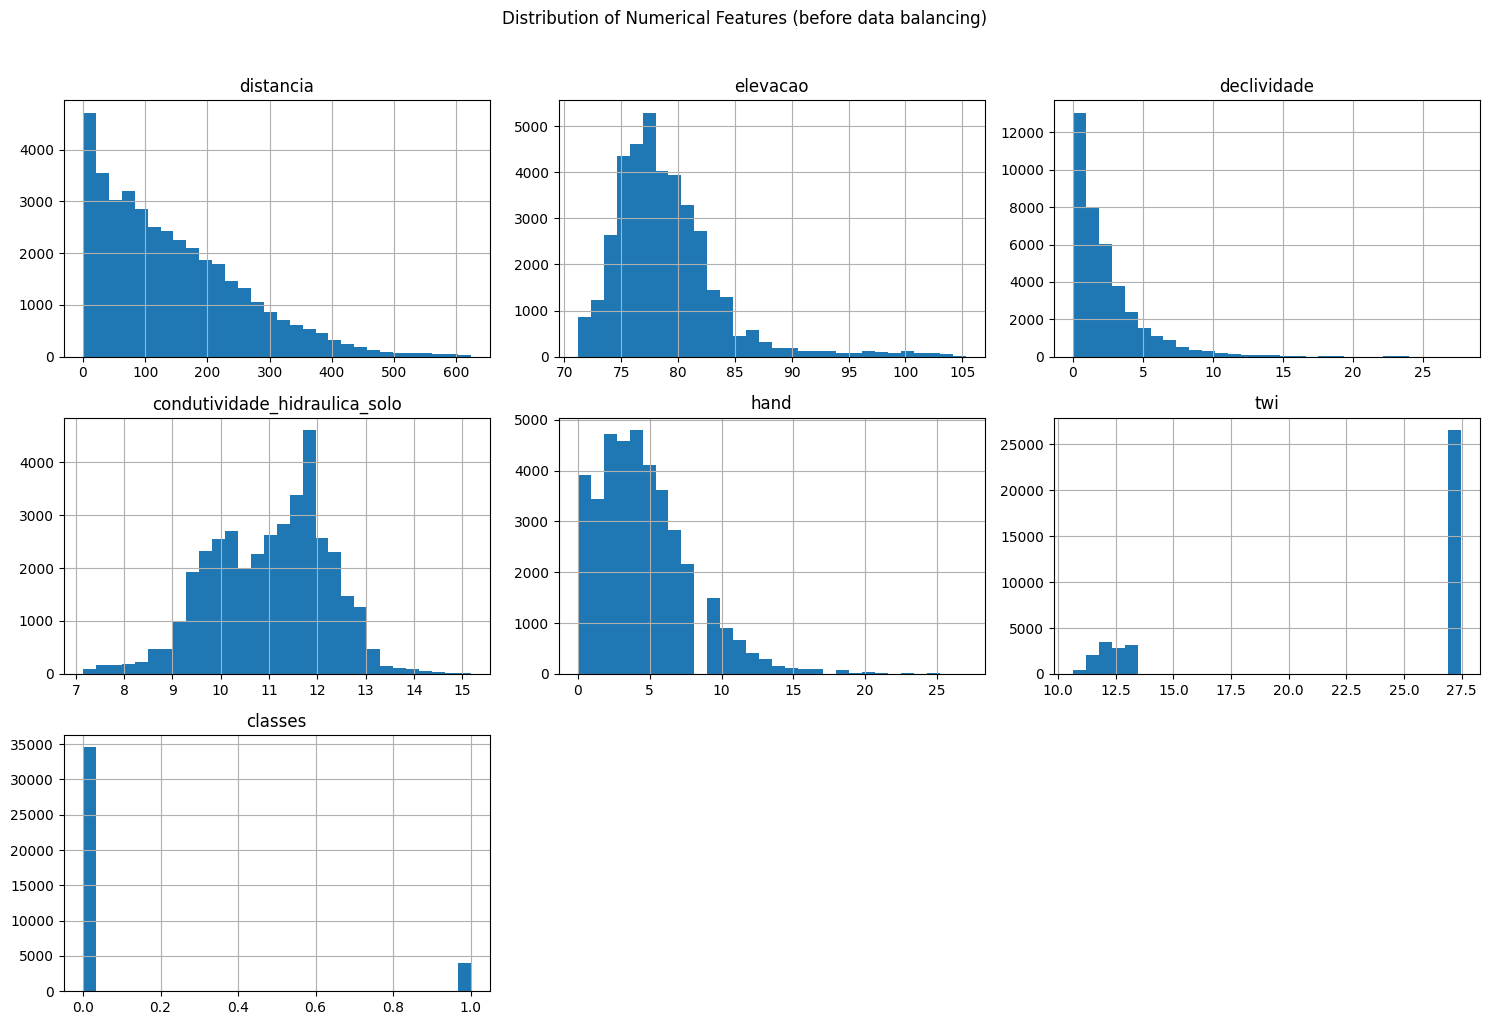

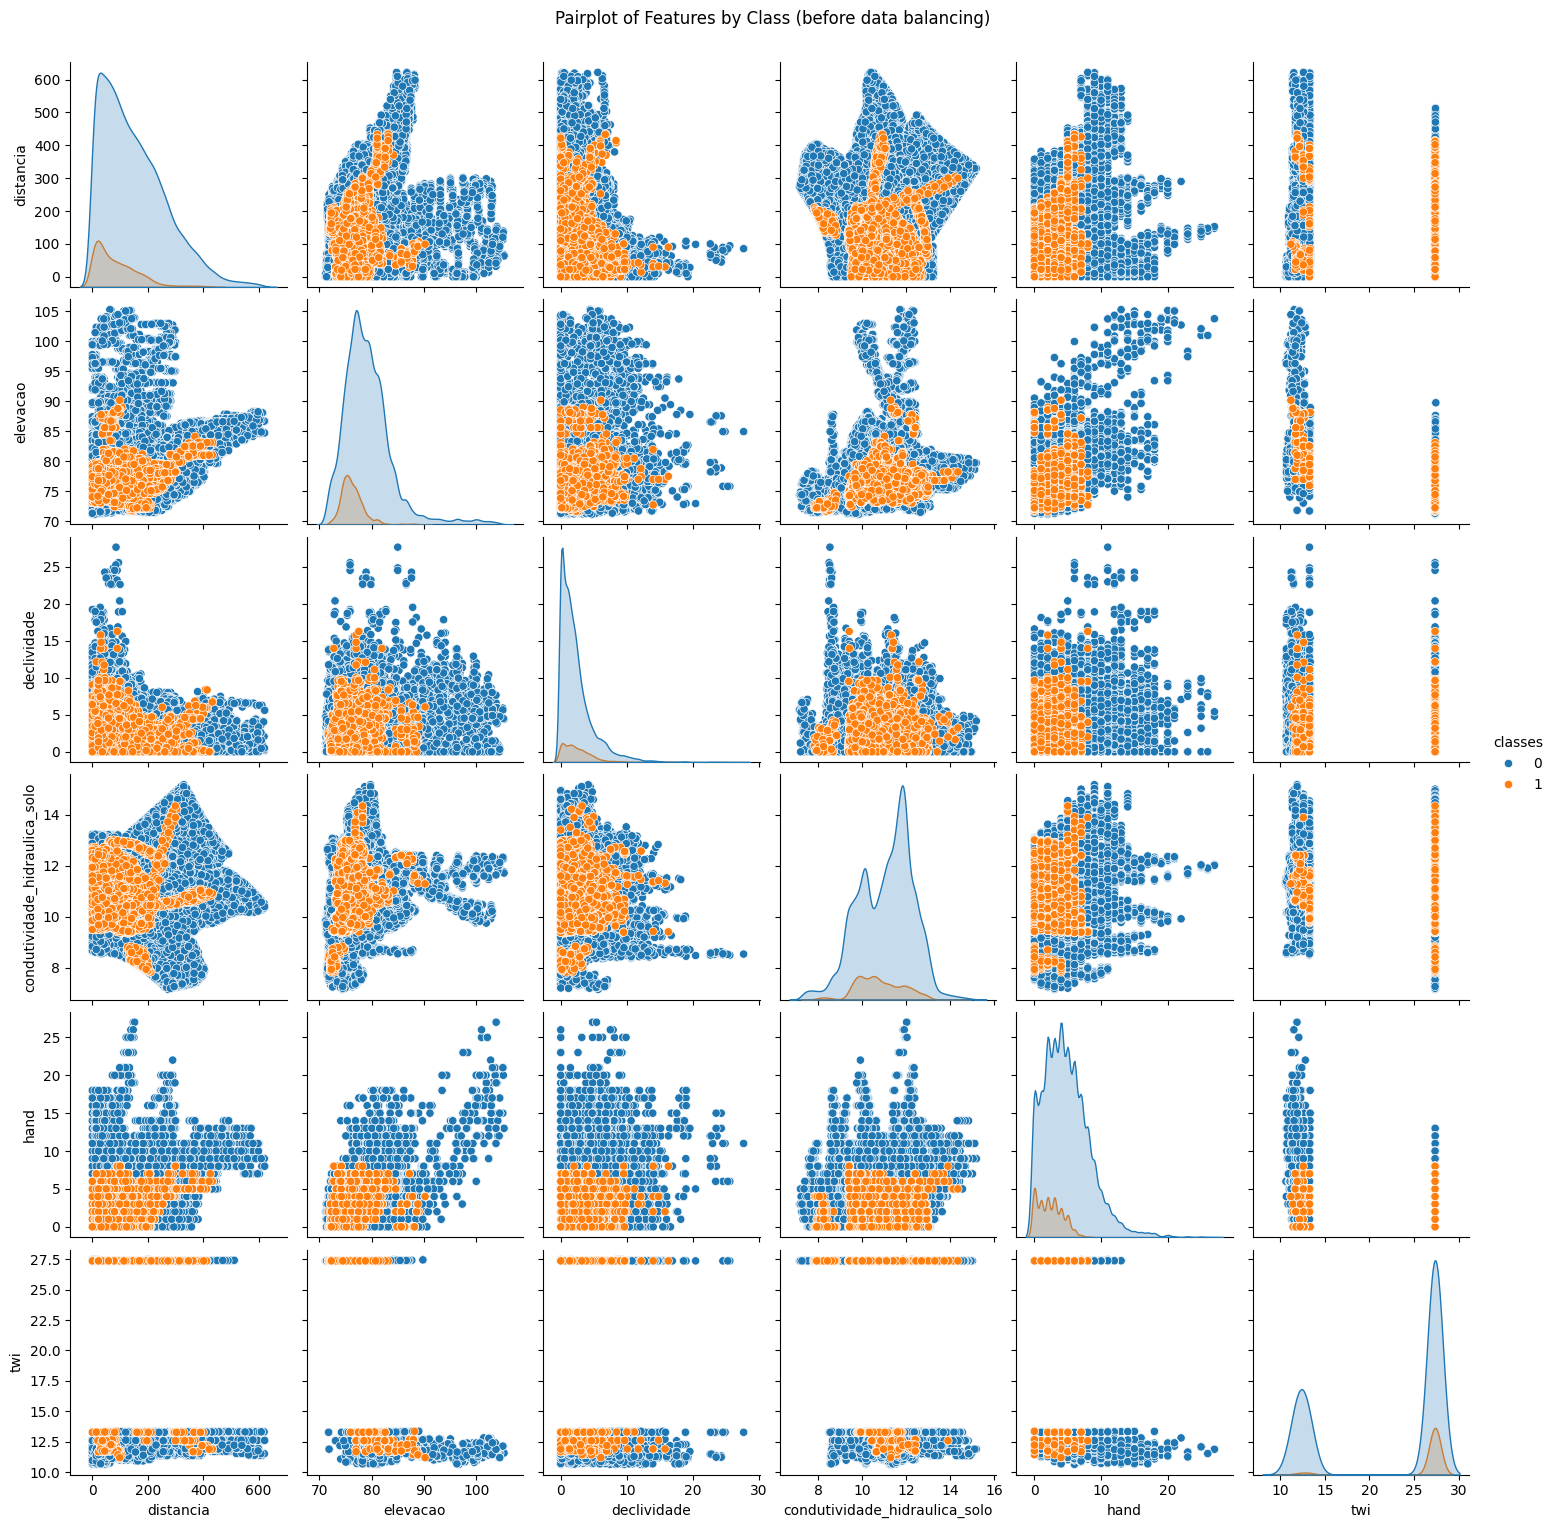

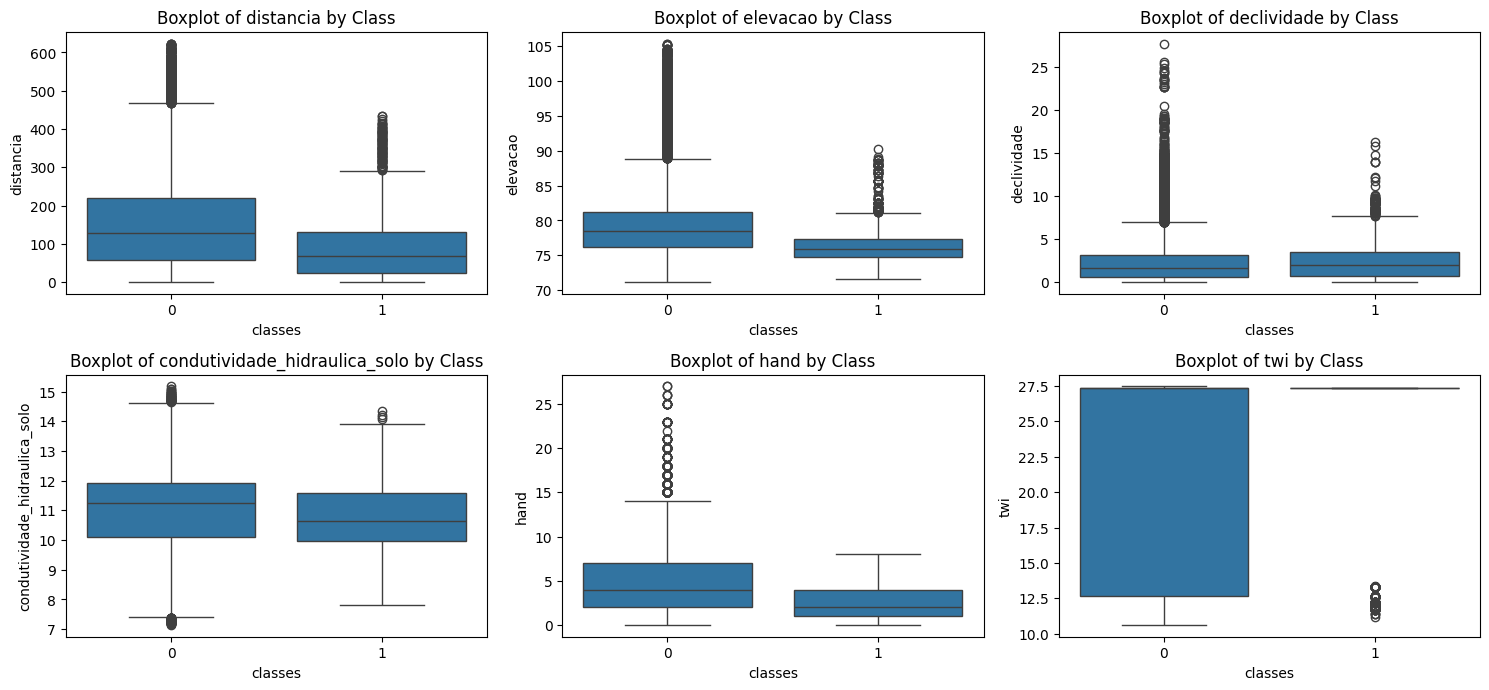

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar as colunas relevantes para a matriz de correlação e reordenar
data_for_analysis = data.drop(columns=['system:index', 'usocobersolo_classification_2022', '.geo'])
column_order = ['distancia', 'elevacao', 'declividade', 'condutividade_hidraulica_solo', 'hand', 'twi', 'classes']
data_for_analysis = data_for_analysis[column_order]

# Visualize distributions of numerical features
data_for_analysis.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features (before data balancing)', y=1.02)
plt.tight_layout()
plt.show()

# Visualize relationships between features using pairplot
sns.pairplot(data_for_analysis, hue='classes', diag_kind='kde')
plt.suptitle('Pairplot of Features by Class (before data balancing)', y=1.02)
plt.show()

# Visualize boxplots for each feature by class
plt.figure(figsize=(15, 10))
for i, col in enumerate(data_for_analysis.columns[:-1]): # Exclude the target variable for individual boxplots
    plt.subplot(3, 3, i + 1) # Changed from 2x2 to 3x3 grid
    sns.boxplot(x='classes', y=col, data=data_for_analysis)
    plt.title(f'Boxplot of {col} by Class')
plt.tight_layout()
plt.show()

Pearson Correlation Matrix for all classes:


distancia  elevacao  declividade  \
distancia                       1.000000  0.255768    -0.211710   
elevacao                        0.255768  1.000000     0.130918   
declividade                    -0.211710  0.130918     1.000000   
condutividade_hidraulica_solo  -0.081080  0.142238    -0.071243   
hand                            0.375882  0.607921     0.087436   
twi                            -0.186415 -0.664921    -0.132725   

                               condutividade_hidraulica_solo      hand  \
distancia                                          -0.081080  0.375882   
elevacao                                            0.142238  0.607921   
declividade                                        -0.071243  0.087436   
condutividade_hidraulica_solo                       1.000000 -0.026602   
hand                                               -0.026602  1.000000   
twi                                                -0.066378 -0.575888   

                                    twi  
distancia                     -0.186415  
elevacao                      -0.664921  
declividade                   -0.132725  
condutividade_hidraulica_solo -0.066378  
hand                          -0.575888  
twi                            1.000000

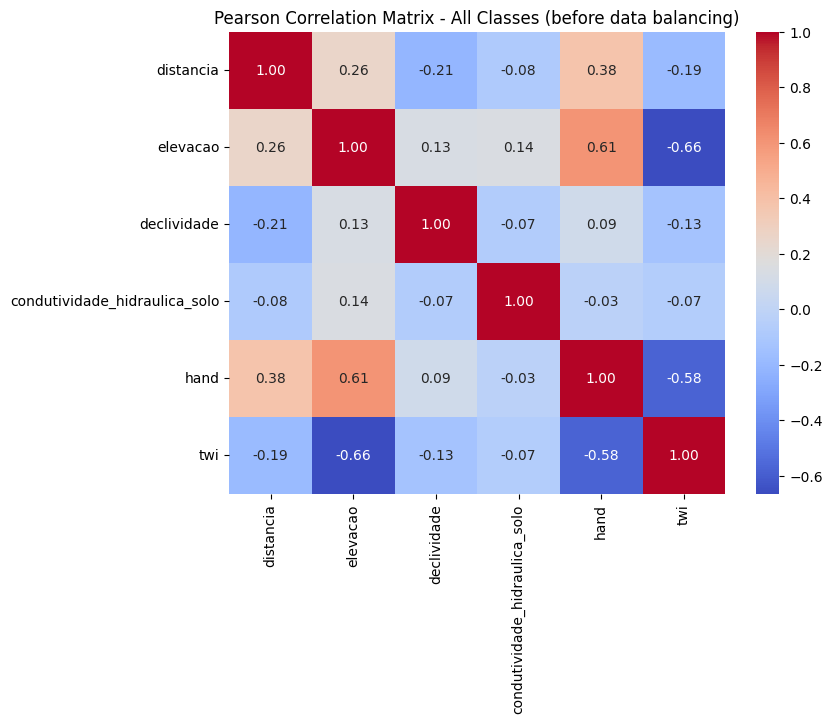

Matriz de Correlação de Pearson para a Classe 0:


distancia  elevacao  declividade  \
distancia                       1.000000  0.231777    -0.220800   
elevacao                        0.231777  1.000000     0.136410   
declividade                    -0.220800  0.136410     1.000000   
condutividade_hidraulica_solo  -0.098830  0.124500    -0.080424   
hand                            0.350490  0.601602     0.093508   
twi                            -0.160222 -0.654392    -0.136124   

                               condutividade_hidraulica_solo      hand  \
distancia                                          -0.098830  0.350490   
elevacao                                            0.124500  0.601602   
declividade                                        -0.080424  0.093508   
condutividade_hidraulica_solo                       1.000000 -0.046463   
hand                                               -0.046463  1.000000   
twi                                                -0.054418 -0.568834   

                                    twi  
distancia                     -0.160222  
elevacao                      -0.654392  
declividade                   -0.136124  
condutividade_hidraulica_solo -0.054418  
hand                          -0.568834  
twi                            1.000000

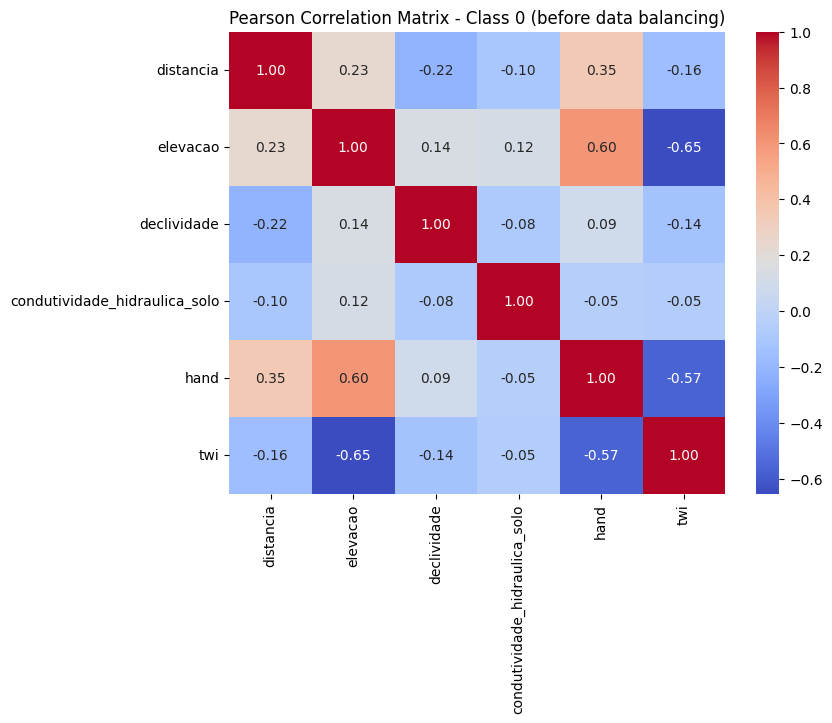


Matriz de Correlação de Pearson para a Classe 1:


distancia  elevacao  declividade  \
distancia                       1.000000  0.225721    -0.097603   
elevacao                        0.225721  1.000000     0.126196   
declividade                    -0.097603  0.126196     1.000000   
condutividade_hidraulica_solo  -0.016465  0.325182     0.050355   
hand                            0.401275  0.230494     0.065370   
twi                            -0.167782 -0.589409    -0.168652   

                               condutividade_hidraulica_solo      hand  \
distancia                                          -0.016465  0.401275   
elevacao                                            0.325182  0.230494   
declividade                                         0.050355  0.065370   
condutividade_hidraulica_solo                       1.000000  0.035788   
hand                                                0.035788  1.000000   
twi                                                -0.084007 -0.204764   

                                    twi  
distancia                     -0.167782  
elevacao                      -0.589409  
declividade                   -0.168652  
condutividade_hidraulica_solo -0.084007  
hand                          -0.204764  
twi                            1.000000

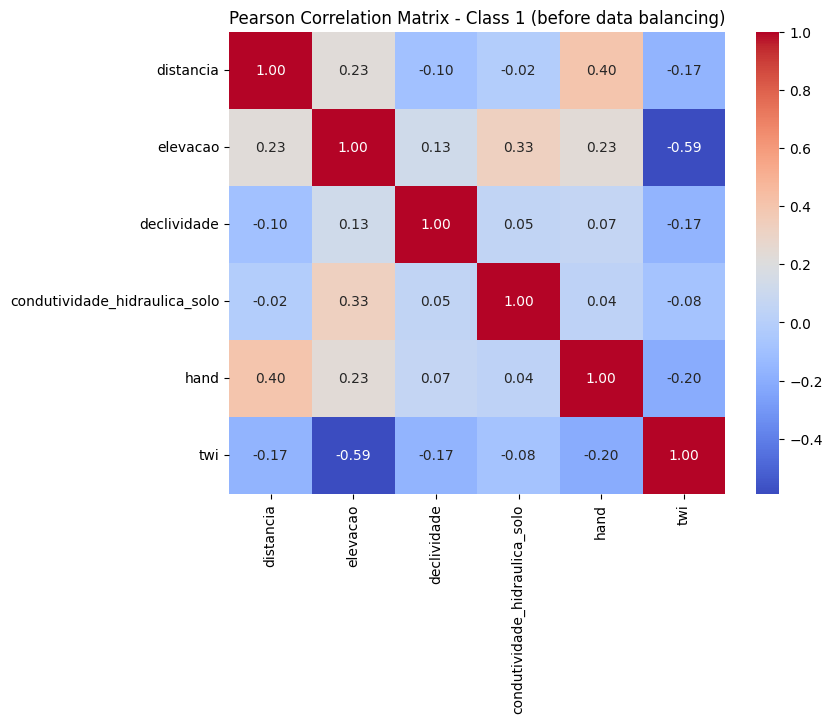

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Pearson correlation matrix for all classes
correlation_matrix_all = data_for_analysis.drop(columns=['classes']).corr(method='pearson')

# Display the correlation matrix for all classes
print("Pearson Correlation Matrix for all classes:")
display(correlation_matrix_all)

# Visualize the correlation matrix for all classes as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix - All Classes (before data balancing)')
plt.show()


# Calcular a matriz de correlação de Pearson para a classe 0
correlation_matrix_class_0 = data_for_analysis[data_for_analysis['classes'] == 0].drop(columns=['classes']).corr(method='pearson')

# Exibir a matriz de correlação para a classe 0
print("Matriz de Correlação de Pearson para a Classe 0:")
display(correlation_matrix_class_0)

# Visualizar a matriz de correlação para a classe 0 como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_class_0, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix - Class 0 (before data balancing)')
plt.show()

# Calcular a matriz de correlação de Pearson para a classe 1
correlation_matrix_class_1 = data_for_analysis[data_for_analysis['classes'] == 1].drop(columns=['classes']).corr(method='pearson')

# Exibir a matriz de correlação para a classe 1
print("\nMatriz de Correlação de Pearson para a Classe 1:")
display(correlation_matrix_class_1)

# Visualizar a matriz de correlação para a classe 1 como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_class_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix - Class 1 (before data balancing)')
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Todas as classes
X_vif = data_for_analysis.drop(columns=['classes'])
X_vif = sm.add_constant(X_vif)  # <── adiciona a constante

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]
vif_data = vif_data[vif_data["feature"] != "const"]  # remove a constante da tabela
print("Variance Inflation Factor (VIF) for all features:")
display(vif_data)

# Classe 0
X_vif_class_0 = data_for_analysis[data_for_analysis['classes'] == 0].drop(columns=['classes'])
X_vif_class_0 = sm.add_constant(X_vif_class_0)

vif_data_class_0 = pd.DataFrame()
vif_data_class_0["feature"] = X_vif_class_0.columns
vif_data_class_0["VIF"] = [variance_inflation_factor(X_vif_class_0.values, i)
                           for i in range(X_vif_class_0.shape[1])]
vif_data_class_0 = vif_data_class_0[vif_data_class_0["feature"] != "const"]
print("\nVariance Inflation Factor (VIF) for features in Class 0:")
display(vif_data_class_0)

# Classe 1
X_vif_class_1 = data_for_analysis[data_for_analysis['classes'] == 1].drop(columns=['classes'])
X_vif_class_1 = sm.add_constant(X_vif_class_1)

vif_data_class_1 = pd.DataFrame()
vif_data_class_1["feature"] = X_vif_class_1.columns
vif_data_class_1["VIF"] = [variance_inflation_factor(X_vif_class_1.values, i)
                           for i in range(X_vif_class_1.shape[1])]
vif_data_class_1 = vif_data_class_1[vif_data_class_1["feature"] != "const"]
print("\nVariance Inflation Factor (VIF) for features in Class 1:")
display(vif_data_class_1)


'''Valor do VIF Interpretação
1       Nenhuma correlação com outras variáveis
1–5     Correlação moderada, geralmente aceitável
> 5     Multicolinearidade preocupante
> 10    Muito alta – deve remover ou combinar variáveis'''

Variance Inflation Factor (VIF) for all features:


feature       VIF
1                      distancia  1.278102
2                       elevacao  2.172282
3                    declividade  1.115718
4  condutividade_hidraulica_solo  1.065105
5                           hand  1.923663
6                            twi  1.969064


Variance Inflation Factor (VIF) for features in Class 0:


feature       VIF
1                      distancia  1.259896
2                       elevacao  2.113849
3                    declividade  1.124469
4  condutividade_hidraulica_solo  1.067791
5                           hand  1.890031
6                            twi  1.923319


Variance Inflation Factor (VIF) for features in Class 1:


feature       VIF
1                      distancia  1.259402
2                       elevacao  1.808887
3                    declividade  1.057803
4  condutividade_hidraulica_solo  1.150966
5                           hand  1.238030
6                            twi  1.596778

'Valor do VIF Interpretação\n1       Nenhuma correlação com outras variáveis\n1–5     Correlação moderada, geralmente aceitável\n> 5     Multicolinearidade preocupante\n> 10    Muito alta – deve remover ou combinar variáveis'

In [ ]:
import pandas as pd

# Generate basic statistics for the entire data_for_analysis DataFrame
print("Basic Statistics for the entire dataset:")
display(data_for_analysis.describe())

# Generate basic statistics for Class 0
print("\nBasic Statistics for Class 0:")
display(data_for_analysis[data_for_analysis['classes'] == 0].describe())

# Generate basic statistics for Class 1
print("\nBasic Statistics for Class 1:")
display(data_for_analysis[data_for_analysis['classes'] == 1].describe())

Basic Statistics for the entire dataset:


distancia      elevacao   declividade  \
count  38571.000000  38571.000000  38571.000000   
mean     144.047020     78.934477      2.310530   
std      115.016478      4.695612      2.504334   
min        0.000000     71.190000      0.000000   
25%       50.000000     75.870000      0.556984   
50%      120.415946     78.080000      1.616841   
75%      212.132034     81.030000      3.170374   
max      622.896460    105.300000     27.674227   

       condutividade_hidraulica_solo          hand           twi       classes  
count                   38571.000000  38571.000000  38571.000000  38571.000000  
mean                       11.022190      4.517695     22.701154      0.103705  
std                         1.215465      3.385180      6.940906      0.304881  
min                         7.146935      0.000000     10.641694      0.000000  
25%                        10.095959      2.000000     13.276349      0.000000  
50%                        11.170749      4.000000     27.356215      0.000000  
75%                        11.913522      6.000000     27.356215      0.000000  
max                        15.175337     27.000000     27.450401      1.000000


Basic Statistics for Class 0:


distancia      elevacao   declividade  \
count  34571.000000  34571.000000  34571.000000   
mean     150.648772     79.239146      2.302658   
std      116.699406      4.805404      2.549239   
min        0.000000     71.190000      0.000000   
25%       56.568542     76.210000      0.544903   
50%      128.062485     78.490000      1.579161   
75%      220.907220     81.280000      3.120564   
max      622.896460    105.300000     27.674227   

       condutividade_hidraulica_solo          hand           twi  classes  
count                   34571.000000  34571.000000  34571.000000  34571.0  
mean                       11.049089      4.773394     22.264121      0.0  
std                         1.231432      3.430760      7.106539      0.0  
min                         7.146935      0.000000     10.641694      0.0  
25%                        10.113878      2.000000     12.688582      0.0  
50%                        11.236481      4.000000     27.356215      0.0  
75%                        11.926378      7.000000     27.356215      0.0  
max                        15.175337     27.000000     27.450401      0.0


Basic Statistics for Class 1:


distancia     elevacao  declividade  condutividade_hidraulica_solo  \
count  4000.000000  4000.000000  4000.000000                    4000.000000   
mean     86.989727    76.301302     2.378559                      10.789711   
std      78.917010     2.301946     2.075173                       1.039073   
min       0.000000    71.680000     0.000000                       7.820482   
25%      22.360680    74.790000     0.746612                       9.977608   
50%      67.082039    75.890000     1.949484                      10.642435   
75%     130.384048    77.330000     3.527990                      11.577527   
max     434.165867    90.200000    16.279460                      14.340008   

              hand          twi  classes  
count  4000.000000  4000.000000   4000.0  
mean      2.307750    26.478321      1.0  
std       1.823834     3.486103      0.0  
min       0.000000    11.195211      1.0  
25%       1.000000    27.356215      1.0  
50%       2.000000    27.356215      1.0  
75%       4.000000    27.356215      1.0  
max       8.000000    27.356215      1.0

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar atributos e classes
X = data.drop(columns=['system:index', 'usocobersolo_classification_2022', 'classes', '.geo'])  # Remover colunas não numéricas
y = data['classes']

# Aplicar SMOTE para aumentar 50% vezes as amostras da classe minoritária
smote = SMOTE(sampling_strategy=0.2, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Verificar a distribuição das classes antes e depois do SMOTE
y.value_counts(), y_res.value_counts()

(classes
 0    34571
 1     4000
 Name: count, dtype: int64,
 classes
 0    34571
 1     6914
 Name: count, dtype: int64)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Separar os dados em rotulados (classe 1) e não rotulados (classe 0)
X_labeled = X_res[y_res == 1]
y_labeled = y_res[y_res == 1]

X_unlabeled = X_res[y_res == 0]
y_unlabeled = y_res[y_res == 0]

# Selecionar 20% das amostras rotuladas como "spies"
X_spy, X_labeled_train, y_spy, y_labeled_train = train_test_split(
    X_labeled, y_labeled, test_size=0.8, random_state=42, stratify=y_labeled
)

print("Shape of y_spy:", y_spy.shape)
print("Shape of y_labeled_train:", y_labeled_train.shape)
print("Shape of y_unlabeled:", y_unlabeled.shape)

y_spy_fake = pd.Series([0] * len(y_spy), index=y_spy.index)

# Misturar os "spies" com os dados não rotulados
X_train_spy = pd.concat([X_labeled_train, X_unlabeled, X_spy])
y_train_spy = pd.concat([y_labeled_train, y_unlabeled, y_spy_fake])

# Embaralhar os dados
shuffle_index = np.random.permutation(len(X_train_spy))
X_train_spy = X_train_spy.iloc[shuffle_index].reset_index(drop=True)
y_train_spy = y_train_spy.iloc[shuffle_index].reset_index(drop=True)

print('--------------')
print("Shape of X_train_spy:", X_train_spy.shape)
print("Shape of y_train_spy:", y_train_spy.shape)
print("\nValue counts of y_train_spy:")
print(y_train_spy.value_counts())

Shape of y_spy: (1382,)
Shape of y_labeled_train: (5532,)
Shape of y_unlabeled: (34571,)
--------------
Shape of X_train_spy: (41485, 6)
Shape of y_train_spy: (41485,)

Value counts of y_train_spy:
0    35953
1     5532
Name: count, dtype: int64


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Inicializar o classificador Naive Bayes
nb_classifier = GaussianNB()

# Treinar o classificador com os dados de treino, incluindo os spies
nb_classifier.fit(X_train_spy, y_train_spy)

# Calcular as probabilidades para os dados de treino
proba_spy = nb_classifier.predict_proba(X_spy)

# Exibir as primeiras probabilidades
print("Probabilidades calculadas pelo Naive Bayes:")
print(proba_spy[:5])

Probabilidades calculadas pelo Naive Bayes:
[[3.36865748e-01 6.63134252e-01]
 [1.36775226e-01 8.63224774e-01]
 [1.42523676e-01 8.57476324e-01]
 [9.99999996e-01 3.78171482e-09]
 [3.87831468e-01 6.12168532e-01]]


In [ ]:
proba_positive = proba_spy[:, 1]
print("Probabilidades da classe positiva:")
print(proba_positive[:5])

Probabilidades da classe positiva:
[6.63134252e-01 8.63224774e-01 8.57476324e-01 3.78171482e-09
 6.12168532e-01]


In [ ]:
import numpy as np

media = np.mean(proba_positive)
desvio_padrao = np.std(proba_positive)
mediana = np.median(proba_positive)
quartis = np.percentile(proba_positive, [25, 50, 75])

print(f"Média: {media:.2f}")
print(f"Desvio padrão: {desvio_padrao:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Primeiro quartil (Q1): {quartis[0]:.2f}")

limiar_corte = media - desvio_padrao
print(f"Limiar de corte definido como Média - Desvio Padrão: {limiar_corte:.2f}")

Média: 0.65
Desvio padrão: 0.28
Mediana: 0.76
Primeiro quartil (Q1): 0.53
Limiar de corte definido como Média - Desvio Padrão: 0.37


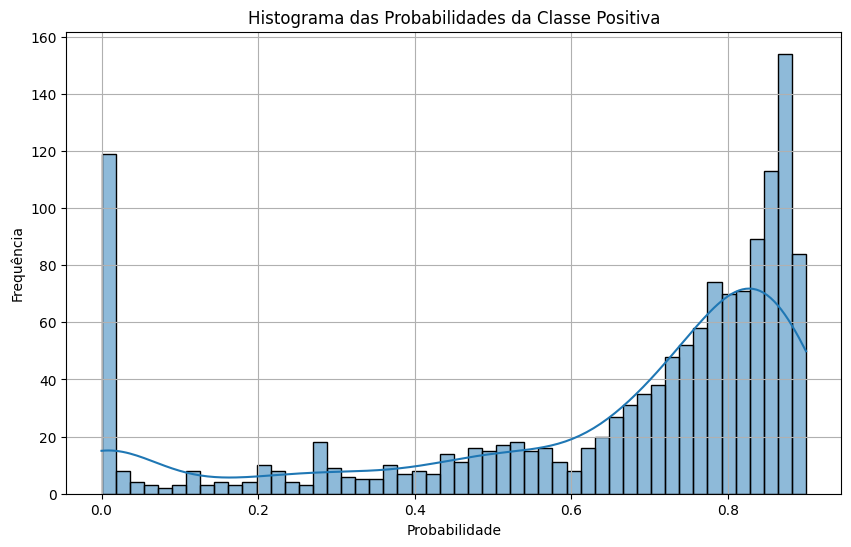

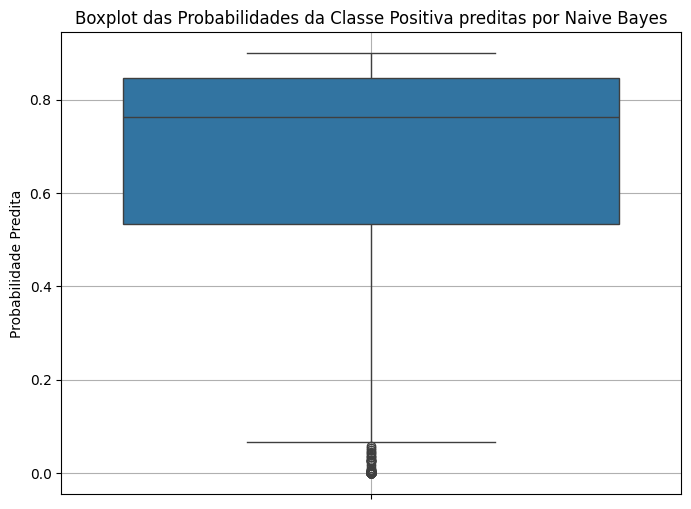

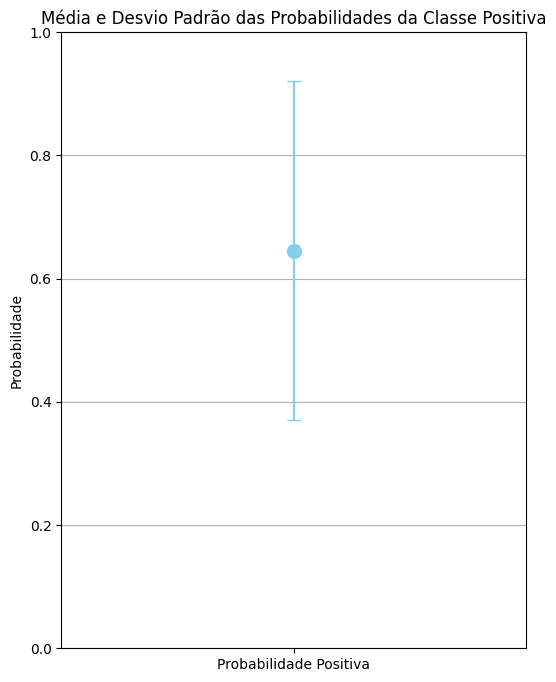

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Criar o histograma
plt.figure(figsize=(10, 6))
sns.histplot(proba_positive, bins=50, kde=True)
plt.title('Histograma das Probabilidades da Classe Positiva')
plt.xlabel('Probabilidade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Criar o boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=proba_positive)
plt.title('Boxplot das Probabilidades da Classe Positiva preditas por Naive Bayes')
plt.ylabel('Probabilidade Predita')
plt.grid(True)
plt.show()

# Criar o gráfico com um ponto (círculo) e barras de erro
plt.figure(figsize=(6, 8))
plt.errorbar(['Probabilidade Positiva'], [media], yerr=[desvio_padrao], fmt='o', capsize=5, color='skyblue', markersize=10)
plt.title('Média e Desvio Padrão das Probabilidades da Classe Positiva')
plt.ylabel('Probabilidade')
plt.ylim(0, 1)  # Definir o limite do eixo y entre 0 e 1
plt.grid(axis='y')
plt.show()

In [ ]:
# Contar amostras menores que o limiar_corte
count_smaller = (proba_positive < limiar_corte).sum()

# Contar amostras maiores que o limiar_corte
count_larger = (proba_positive >= limiar_corte).sum()

print(f"Número de amostras com probabilidade menor que {limiar_corte:.2f}: {count_smaller}")
print(f"Número de amostras com probabilidade maior ou igual a {limiar_corte:.2f}: {count_larger}")

Número de amostras com probabilidade menor que 0.37: 236
Número de amostras com probabilidade maior ou igual a 0.37: 1146


In [ ]:
# Prever as classes e as probabilidades para os dados não rotulados
predicted_proba = nb_classifier.predict_proba(X_unlabeled)
predicted_classes = nb_classifier.predict(X_unlabeled)


# Criar um DataFrame com os dados não rotulados e as classes previstas
unlabeled_predictions_df = X_unlabeled.copy()
unlabeled_predictions_df['predicted_classes'] = predicted_classes
unlabeled_predictions_df['proba_class_0'] = predicted_proba[:, 0]
unlabeled_predictions_df['proba_class_1'] = predicted_proba[:, 1]


# Exibir as primeiras linhas do novo DataFrame e a contagem das classes previstas
print("DataFrame com dados não rotulados, classes previstas e probabilidades:")
display(unlabeled_predictions_df.head(10))

print("\nContagem das classes previstas nos dados não rotulados:")
print(unlabeled_predictions_df['predicted_classes'].value_counts())

DataFrame com dados não rotulados, classes previstas e probabilidades:


condutividade_hidraulica_solo  declividade   distancia  elevacao  hand  \
0                      10.117499     0.000000   92.195445     80.58   6.0   
1                      10.876799     0.529501  181.107703     79.48   7.0   
2                      10.191469     6.678944  247.588368    102.51  18.0   
3                      11.631157     0.000000    0.000000     79.53   1.0   
4                       9.039243     4.003392   70.710678     74.96   2.0   
5                      11.326554     3.062228  180.277564     90.99   9.0   
6                      11.371239     3.871774   92.195445     82.45   3.0   
7                      11.270289     1.607093  310.483494     82.21   7.0   
8                      10.918427     4.071311    0.000000     79.23   1.0   
9                      11.897470     0.000000   89.442719     78.97   3.0   

         twi  predicted_classes  proba_class_0  proba_class_1  
0  27.356215                  0       0.940819   5.918125e-02  
1  12.595492                  0       0.999994   5.555455e-06  
2  11.743671                  0       1.000000   3.570202e-45  
3  27.356215                  1       0.452091   5.479092e-01  
4  27.356215                  1       0.137655   8.623449e-01  
5  11.794255                  0       1.000000   6.422446e-16  
6  12.583338                  0       0.999981   1.856565e-05  
7  27.356215                  0       0.999853   1.469938e-04  
8  27.356215                  1       0.311173   6.888267e-01  
9  27.356215                  1       0.483901   5.160990e-01


Contagem das classes previstas nos dados não rotulados:
predicted_classes
0    23626
1    10945
Name: count, dtype: int64


In [ ]:
# Adicionar a nova coluna 'new_class' com base no limiar de corte
unlabeled_predictions_df['new_class'] = (unlabeled_predictions_df['proba_class_1'] >= limiar_corte).astype(int)

# Exibir as primeiras linhas do DataFrame com a nova coluna
print("DataFrame com a nova coluna 'new_class':")
display(unlabeled_predictions_df.head(1000))

# Exibir a contagem de valores na nova coluna
print("\nContagem de valores na nova coluna 'new_class':")
print(unlabeled_predictions_df['new_class'].value_counts())

DataFrame com a nova coluna 'new_class':


condutividade_hidraulica_solo  declividade   distancia  elevacao  hand  \
0                        10.117499     0.000000   92.195445     80.58   6.0   
1                        10.876799     0.529501  181.107703     79.48   7.0   
2                        10.191469     6.678944  247.588368    102.51  18.0   
3                        11.631157     0.000000    0.000000     79.53   1.0   
4                         9.039243     4.003392   70.710678     74.96   2.0   
..                             ...          ...         ...       ...   ...   
995                      11.861421     0.000000   67.082039     75.76   2.0   
996                      11.241820     2.668959  111.803399     77.00   3.0   
997                       9.159134     0.911209  310.000000     76.99   4.0   
998                      11.561402    12.043547   50.000000     78.79   5.0   
999                       9.670851     0.000000    0.000000     71.34   0.0   

           twi  predicted_classes  proba_class_0  proba_class_1  new_class  
0    27.356215                  0       0.940819   5.918125e-02          0  
1    12.595492                  0       0.999994   5.555455e-06          0  
2    11.743671                  0       1.000000   3.570202e-45          0  
3    27.356215                  1       0.452091   5.479092e-01          1  
4    27.356215                  1       0.137655   8.623449e-01          1  
..         ...                ...            ...            ...        ...  
995  27.356215                  1       0.188234   8.117662e-01          1  
996  27.356215                  1       0.212591   7.874088e-01          1  
997  27.356215                  0       0.921414   7.858608e-02          0  
998  12.607614                  0       0.999995   4.540245e-06          0  
999  27.356215                  1       0.439368   5.606315e-01          1  

[1000 rows x 10 columns]


Contagem de valores na nova coluna 'new_class':
new_class
0    21675
1    12896
Name: count, dtype: int64


In [ ]:
unlabeled_predictions_df = unlabeled_predictions_df.drop(columns=['predicted_classes', 'proba_class_0', 'proba_class_1'])
display(unlabeled_predictions_df.head())
print("\nColumns after dropping:")
print(unlabeled_predictions_df.columns)

condutividade_hidraulica_solo  declividade   distancia  elevacao  hand  \
0                      10.117499     0.000000   92.195445     80.58   6.0   
1                      10.876799     0.529501  181.107703     79.48   7.0   
2                      10.191469     6.678944  247.588368    102.51  18.0   
3                      11.631157     0.000000    0.000000     79.53   1.0   
4                       9.039243     4.003392   70.710678     74.96   2.0   

         twi  new_class  
0  27.356215          0  
1  12.595492          0  
2  11.743671          0  
3  27.356215          1  
4  27.356215          1


Columns after dropping:
Index(['condutividade_hidraulica_solo', 'declividade', 'distancia', 'elevacao',
       'hand', 'twi', 'new_class'],
      dtype='object')


In [ ]:
# Create a copy of the X_labeled DataFrame and reset its index
labeled_df = X_labeled.copy().reset_index(drop=True)

# Add the 'new_class' column from y_labeled
labeled_df['new_class'] = y_labeled.reset_index(drop=True)

print(labeled_df['new_class'].value_counts())
print(unlabeled_predictions_df['new_class'].value_counts())

new_class
1    6914
Name: count, dtype: int64
new_class
0    21675
1    12896
Name: count, dtype: int64


In [ ]:
# Concatenate labeled and unlabeled dataframes
combined_df = pd.concat([labeled_df, unlabeled_predictions_df], ignore_index=True)

print("Combined DataFrame:")
display(combined_df.head())
print("\nValue counts of new_class in combined DataFrame:")
print(combined_df['new_class'].value_counts())

Combined DataFrame:


condutividade_hidraulica_solo  declividade   distancia  elevacao  hand  \
0                       9.892485     1.349536   80.622577     77.80   2.0   
1                      10.574956     5.361726   53.851648     73.56   3.0   
2                       9.745265     4.247594   70.710678     75.68   0.0   
3                      10.541502     0.000000  269.258240     79.32   4.0   
4                      10.493550     1.904596   44.721360     74.59   0.0   

         twi  new_class  
0  27.356215          1  
1  27.356215          1  
2  27.356215          1  
3  27.356215          1  
4  27.356215          1


Value counts of new_class in combined DataFrame:
new_class
0    21675
1    19810
Name: count, dtype: int64


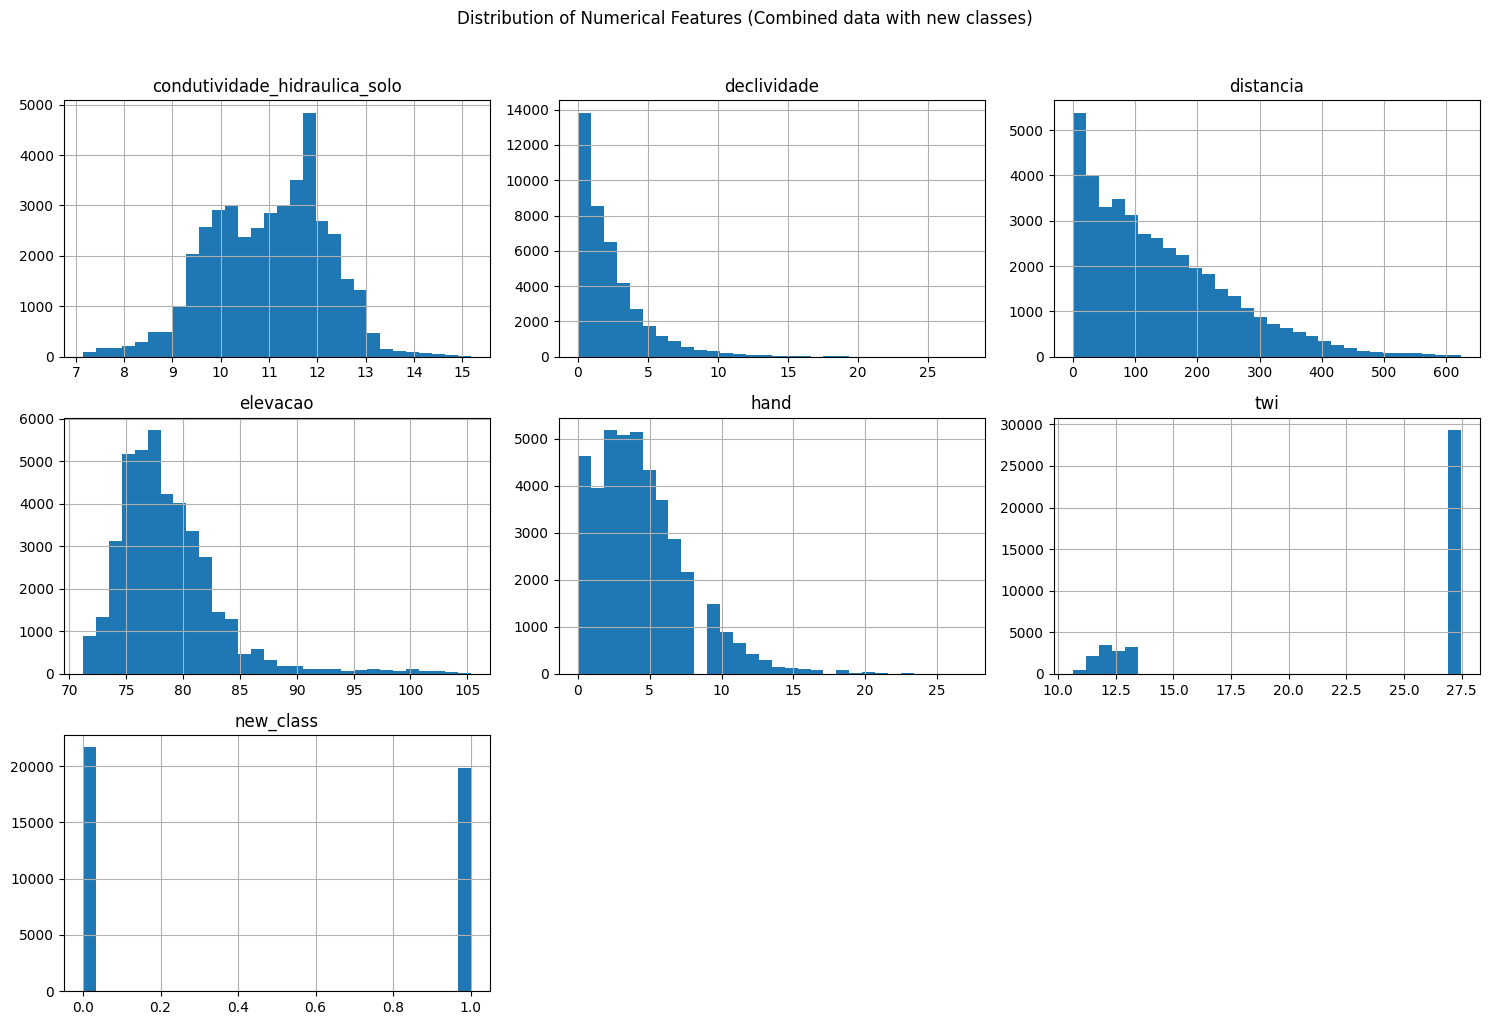

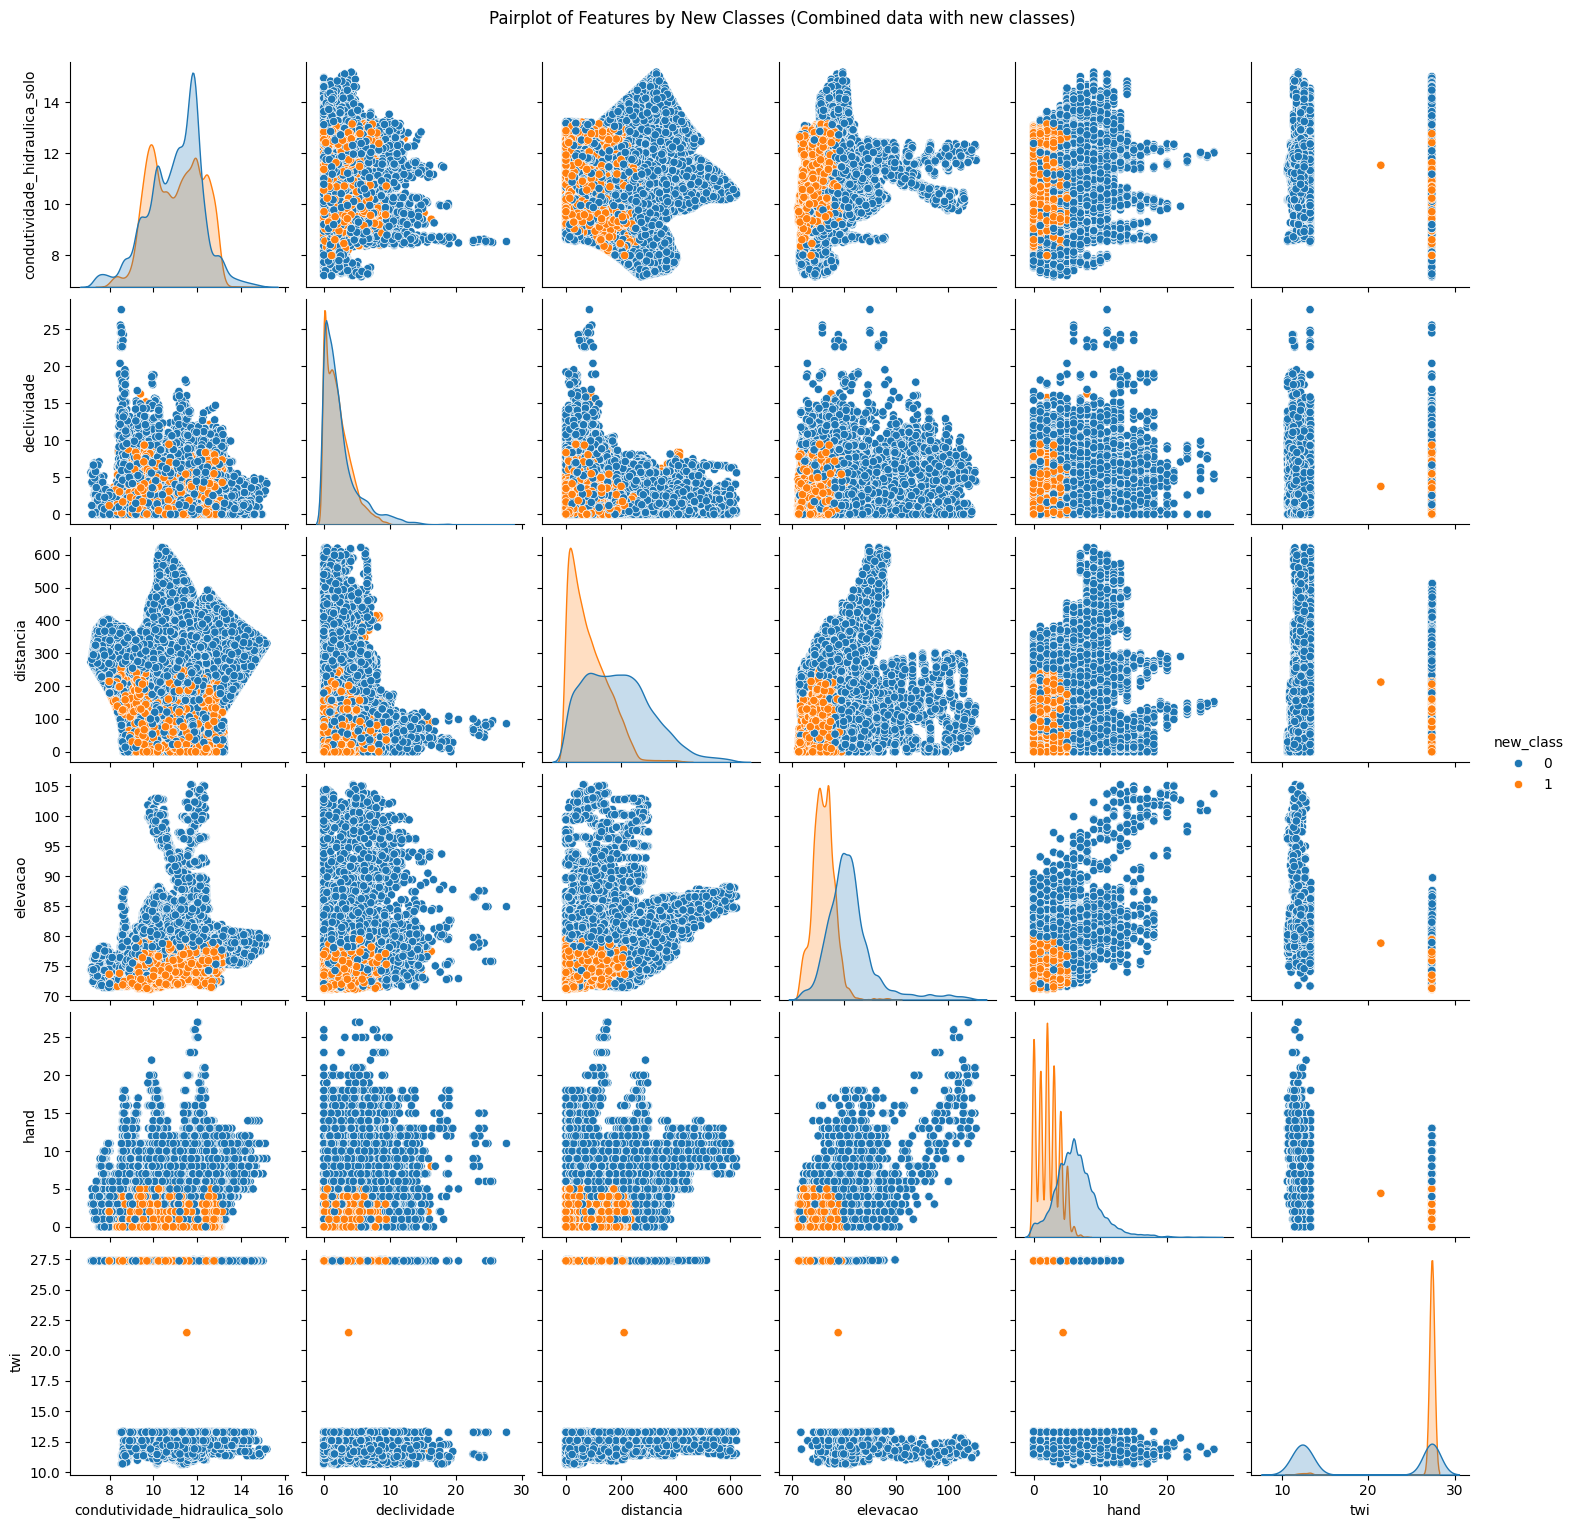

Pearson Correlation Matrix for all classes (Combined Data):


condutividade_hidraulica_solo  declividade  \
condutividade_hidraulica_solo                       1.000000    -0.065676   
declividade                                        -0.065676     1.000000   
distancia                                          -0.071099    -0.206917   
elevacao                                            0.154921     0.127144   
hand                                               -0.014411     0.083787   
twi                                                -0.074630    -0.130030   

                               distancia  elevacao      hand       twi  
condutividade_hidraulica_solo  -0.071099  0.154921 -0.014411 -0.074630  
declividade                    -0.206917  0.127144  0.083787 -0.130030  
distancia                       1.000000  0.270090  0.390632 -0.202638  
elevacao                        0.270090  1.000000  0.611901 -0.671321  
hand                            0.390632  0.611901  1.000000 -0.579885  
twi                            -0.202638 -0.671321 -0.579885  1.000000

Matriz de Correlação de Pearson para a Classe 0:


condutividade_hidraulica_solo  declividade  \
condutividade_hidraulica_solo                       1.000000    -0.085715   
declividade                                        -0.085715     1.000000   
distancia                                          -0.054712    -0.327691   
elevacao                                            0.188243     0.114381   
hand                                               -0.003343     0.050633   
twi                                                -0.130706    -0.113132   

                               distancia  elevacao      hand       twi  
condutividade_hidraulica_solo  -0.054712  0.188243 -0.003343 -0.130706  
declividade                    -0.327691  0.114381  0.050633 -0.113132  
distancia                       1.000000 -0.017034  0.109912  0.129666  
elevacao                       -0.017034  1.000000  0.444670 -0.534617  
hand                            0.109912  0.444670  1.000000 -0.375459  
twi                             0.129666 -0.534617 -0.375459  1.000000

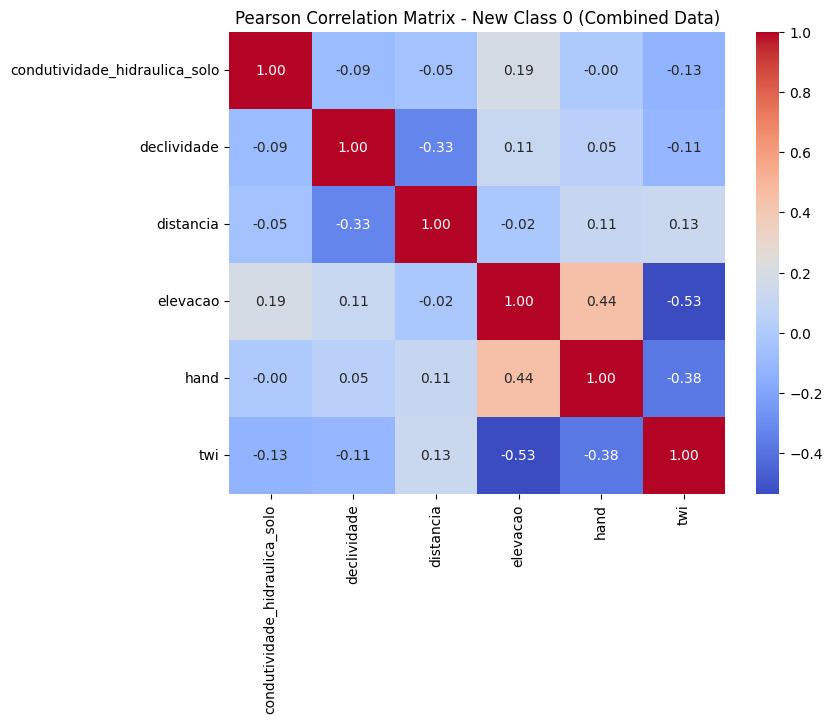


Matriz de Correlação de Pearson para a Classe 1:


condutividade_hidraulica_solo  declividade  \
condutividade_hidraulica_solo                       1.000000    -0.032314   
declividade                                        -0.032314     1.000000   
distancia                                          -0.126643    -0.127867   
elevacao                                            0.251509     0.077027   
hand                                               -0.033100     0.045627   
twi                                                -0.016510    -0.118566   

                               distancia  elevacao      hand       twi  
condutividade_hidraulica_solo  -0.126643  0.251509 -0.033100 -0.016510  
declividade                    -0.127867  0.077027  0.045627 -0.118566  
distancia                       1.000000  0.123630  0.238762 -0.132015  
elevacao                        0.123630  1.000000  0.190582 -0.383839  
hand                            0.238762  0.190582  1.000000 -0.146626  
twi                            -0.132015 -0.383839 -0.146626  1.000000

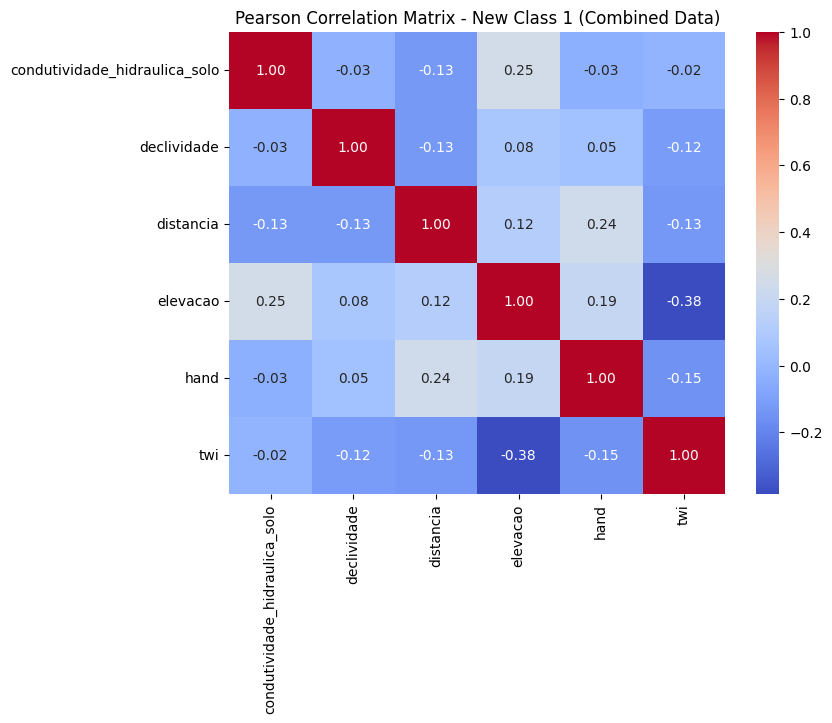

Basic Statistics for the entire dataset:


condutividade_hidraulica_solo   declividade     distancia  \
count                   41485.000000  41485.000000  41485.000000   
mean                       11.003020      2.317156    139.938566   
std                         1.203367      2.473657    113.789084   
min                         7.146935      0.000000      0.000000   
25%                        10.088474      0.574363     50.000000   
50%                        11.125832      1.640734    114.017543   
75%                        11.901548      3.205185    206.155281   
max                        15.175337     27.674227    622.896460   

           elevacao          hand           twi     new_class  
count  41485.000000  41485.000000  41485.000000  41485.000000  
mean      78.738825      4.358229     22.972922      0.477522  
std        4.617007      3.347819      6.821638      0.499501  
min       71.190000      0.000000     10.641694      0.000000  
25%       75.710000      2.000000     13.276349      0.000000  
50%       77.830000      4.000000     27.356215      0.000000  
75%       80.780000      6.000000     27.356215      1.000000  
max      105.300000     27.000000     27.450401      1.000000


Basic Statistics for Class 0:


condutividade_hidraulica_solo   declividade     distancia  \
count                   21675.000000  21675.000000  21675.000000   
mean                       10.993363      2.489231    191.301257   
std                         1.239919      2.857521    121.921063   
min                         7.146935      0.000000      0.000000   
25%                        10.171868      0.591719     92.195445   
50%                        11.155926      1.605657    180.277564   
75%                        11.841229      3.249544    269.258240   
max                        15.175337     27.674227    622.896460   

           elevacao          hand           twi  new_class  
count  21675.000000  21675.000000  21675.000000    21675.0  
mean      81.208468      6.373841     19.234472        0.0  
std        4.913780      3.248041      7.479630        0.0  
min       71.380000      0.000000     10.641694        0.0  
25%       78.380000      4.000000     12.214265        0.0  
50%       80.460000      6.000000     13.288619        0.0  
75%       82.590000      8.000000     27.356215        0.0  
max      105.300000     27.000000     27.450401        0.0


Basic Statistics for Class 1:


condutividade_hidraulica_solo   declividade     distancia  \
count                   19810.000000  19810.000000  19810.000000   
mean                       11.013587      2.128882     83.740366   
std                         1.161997      1.952517     69.327641   
min                         7.820482      0.000000      0.000000   
25%                         9.996694      0.573580     28.284271   
50%                        11.076620      1.691625     69.359313   
75%                        11.970054      3.171540    128.062485   
max                        14.340008     16.279460    434.165867   

           elevacao          hand           twi  new_class  
count  19810.000000  19810.000000  19810.000000    19810.0  
mean      76.036678      2.152858     27.063327        1.0  
std        2.060924      1.618404      2.053343        0.0  
min       71.190000      0.000000     11.195211        1.0  
25%       74.680000      1.000000     27.356215        1.0  
50%       76.000000      2.000000     27.356215        1.0  
75%       77.300000      3.000000     27.356215        1.0  
max       90.200000      8.000000     27.356215        1.0

Variance Inflation Factor (VIF) for all features (Combined Data):


feature       VIF
1  condutividade_hidraulica_solo  1.065703
2                    declividade  1.111029
3                      distancia  1.290964
4                       elevacao  2.212349
5                           hand  1.944349
6                            twi  1.997340


Variance Inflation Factor (VIF) for features in New Class 0:


feature       VIF
1  condutividade_hidraulica_solo  1.069788
2                    declividade  1.157876
3                      distancia  1.178814
4                       elevacao  1.609751
5                           hand  1.338541
6                            twi  1.495606


Variance Inflation Factor (VIF) for features in New Class 1:


feature       VIF
1  condutividade_hidraulica_solo  1.110957
2                    declividade  1.046887
3                      distancia  1.127858
4                       elevacao  1.309982
5                           hand  1.100896
6                            twi  1.206505

'VIF Value Interpretation\n1       No correlation with other variables\n1–5     Moderate correlation, generally acceptable\n> 5     Concerning multicollinearity\n> 10    Very high – should remove or combine variables'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select relevant columns for analysis from combined_df
combined_data_for_analysis = combined_df.drop(columns=[col for col in combined_df.columns if col in ['system:index', 'usocobersolo_classification_2022', '.geo']])

# Visualize distributions of numerical features
combined_data_for_analysis.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features (Combined data with new classes)', y=1.02)
plt.tight_layout()
plt.show()

# Visualize relationships between features using pairplot
sns.pairplot(combined_data_for_analysis, hue='new_class', diag_kind='kde')
plt.suptitle('Pairplot of Features by New Classes (Combined data with new classes)', y=1.02)
plt.show()

# Visualize boxplots for each feature by class
plt.figure(figsize=(15, 10))
for i, col in enumerate(combined_data_for_analysis.columns[:-1]): # Exclude the target variable for individual boxplots
    plt.subplot(3, 3, i + 1) # Changed from 2x2 to 3x3 grid
    sns.boxplot(x='new_class', y=col, data=combined_data_for_analysis)
    plt.title(f'Boxplot of {col} by New Classes')
plt.tight_layout()
plt.show()

# Calculate the Pearson correlation matrix for all classes in the combined data
combined_correlation_matrix_all = combined_data_for_analysis.drop(columns=['new_class']).corr(method='pearson')

# Display the correlation matrix for all classes
print("Pearson Correlation Matrix for all classes (Combined Data):")
display(combined_correlation_matrix_all)

# Visualize the correlation matrix for all classes as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(combined_correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix - All Classes (Combined Data)')
plt.show()


# Calcular a matriz de correlação de Pearson para a classe 0
combined_data_correlation_matrix_class_0 = combined_data_for_analysis[combined_data_for_analysis['new_class'] == 0].drop(columns=['new_class']).corr(method='pearson')

# Exibir a matriz de correlação para a classe 0
print("Matriz de Correlação de Pearson para a Classe 0:")
display(combined_data_correlation_matrix_class_0)

# Visualizar a matriz de correlação para a classe 0 como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(combined_data_correlation_matrix_class_0, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix - New Class 0 (Combined Data)' )
plt.show()

# Calcular a matriz de correlação de Pearson para a classe 1
combined_data_correlation_matrix_class_1 = combined_data_for_analysis[combined_data_for_analysis['new_class'] == 1].drop(columns=['new_class']).corr(method='pearson')

# Exibir a matriz de correlação para a classe 1
print("\nMatriz de Correlação de Pearson para a Classe 1:")
display(combined_data_correlation_matrix_class_1)

# Visualizar a matriz de correlação para a classe 1 como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(combined_data_correlation_matrix_class_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix - New Class 1 (Combined Data)')
plt.show()

# Generate basic statistics for the entire combined_data_for_analysis DataFrame
print("Basic Statistics for the entire dataset:")
display(combined_data_for_analysis.describe())

# Generate basic statistics for Class 0
print("\nBasic Statistics for Class 0:")
display(combined_data_for_analysis[combined_data_for_analysis['new_class'] == 0].describe())

# Generate basic statistics for Class 1
print("\nBasic Statistics for Class 1:")
display(combined_data_for_analysis[combined_data_for_analysis['new_class'] == 1].describe())


# --- Variance Inflation Factor (VIF) Calculation ---

# All classes
# Select features for VIF calculation (exclude the target variable 'new_class')
X_vif_combined = combined_data_for_analysis.drop(columns=['new_class'])
# Add a constant to the features for VIF calculation
X_vif_combined = sm.add_constant(X_vif_combined)

# Calculate VIF for each feature in the combined data
vif_data_combined = pd.DataFrame()
vif_data_combined["feature"] = X_vif_combined.columns
vif_data_combined["VIF"] = [variance_inflation_factor(X_vif_combined.values, i)
                           for i in range(X_vif_combined.shape[1])]
# Remove the constant from the VIF table
vif_data_combined = vif_data_combined[vif_data_combined["feature"] != "const"]
print("Variance Inflation Factor (VIF) for all features (Combined Data):")
display(vif_data_combined)

# Class 0
# Select features for VIF calculation for new class 0
X_vif_combined_class_0 = combined_data_for_analysis[combined_data_for_analysis['new_class'] == 0].drop(columns=['new_class'])
# Add a constant to the features for VIF calculation
X_vif_combined_class_0 = sm.add_constant(X_vif_combined_class_0)

# Calculate VIF for each feature in new Class 0
vif_data_combined_class_0 = pd.DataFrame()
vif_data_combined_class_0["feature"] = X_vif_combined_class_0.columns
vif_data_combined_class_0["VIF"] = [variance_inflation_factor(X_vif_combined_class_0.values, i)
                                   for i in range(X_vif_combined_class_0.shape[1])]
# Remove the constant from the VIF table
vif_data_combined_class_0 = vif_data_combined_class_0[vif_data_combined_class_0["feature"] != "const"]
print("\nVariance Inflation Factor (VIF) for features in New Class 0:")
display(vif_data_combined_class_0)

# Class 1
# Select features for VIF calculation for new class 1
X_vif_combined_class_1 = combined_data_for_analysis[combined_data_for_analysis['new_class'] == 1].drop(columns=['new_class'])
# Add a constant to the features for VIF calculation
X_vif_combined_class_1 = sm.add_constant(X_vif_combined_class_1)

# Calculate VIF for each feature in new Class 1
vif_data_combined_class_1 = pd.DataFrame()
vif_data_combined_class_1["feature"] = X_vif_combined_class_1.columns
vif_data_combined_class_1["VIF"] = [variance_inflation_factor(X_vif_combined_class_1.values, i)
                                   for i in range(X_vif_combined_class_1.shape[1])]
# Remove the constant from the VIF table
vif_data_combined_class_1 = vif_data_combined_class_1[vif_data_combined_class_1["feature"] != "const"]
print("\nVariance Inflation Factor (VIF) for features in New Class 1:")
display(vif_data_combined_class_1)


'''VIF Value Interpretation
1       No correlation with other variables
1–5     Moderate correlation, generally acceptable
> 5     Concerning multicollinearity
> 10    Very high – should remove or combine variables'''

===ATENTION: Execute the first part of the code (increase, labeling, data balancing) up to this cell===

In [ ]:
from google.colab import files

# Exportar o DataFrame final para um arquivo CSV
combined_df.to_csv('combined_dataset.csv', index=False)

print("DataFrame exportado com sucesso para 'combined_dataset.csv'")

# Fazer o download do arquivo
files.download('combined_dataset.csv')

DataFrame exportado com sucesso para 'combined_dataset.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

===ATENTION: Execute the second procedure (separability analysis) in the code starting from the cell below.===

In [ ]:
import pandas as pd
import numpy as np

# Carregar o arquivo CSV para examinar os dados
file_path = '/content/drive/MyDrive/projetoEnchenteAssets/dadosAvaliacaoSeparabilidade.csv'
data_evaluation = pd.read_csv(file_path)

# Exibir as primeiras linhas do arquivo para ver sua estrutura
display(data_evaluation.head())

# Exibir o número de linhas do arquivo
print(f"\nNúmero de linhas no arquivo: {data_evaluation.shape[0]}")

# Exibir a contagem de valores na coluna 'cluster'
print("\nContagem de valores na coluna 'cluster':")
print(data_evaluation['cluster'].value_counts())
# Exibir a contagem de valores na coluna 'cluster'
print("\nContagem de valores na coluna 'classification_hand':")
print(data_evaluation['classification_hand'].value_counts())
# Exibir a contagem de valores na coluna 'cluster'
print("\nContagem de valores na coluna 'classification':")
print(data_evaluation['classification'].value_counts())

system:index  classification  classification_hand  cluster  \
0             0               0                    0        0   
1             1               0                    0        0   
2             2               0                    0        0   
3             3               0                    0        0   
4             4               0                    0        0   

   condutividade_hidraulica_solo  declividade    distancia  elevacao  hand  \
0                      11.197123     5.574930  1334.053972    119.36  64.0   
1                      11.123857     3.911436  1370.000000    118.34  61.0   
2                      11.166330     3.580326  1363.598181    118.34  61.0   
3                      11.208802     3.845496  1357.239846    118.34  62.0   
4                      11.251275     5.335269  1350.925609    117.85  62.0   

         twi                                               .geo  
0  12.429628  {"geodesic":false,"type":"Point","coordinates"...  
1  27.881746  {"geodesic":false,"type":"Point","coordinates"...  
2  27.881746  {"geodesic":false,"type":"Point","coordinates"...  
3  12.703429  {"geodesic":false,"type":"Point","coordinates"...  
4  12.703429  {"geodesic":false,"type":"Point","coordinates"...


Número de linhas no arquivo: 387097

Contagem de valores na coluna 'cluster':
cluster
0    363079
1     24018
Name: count, dtype: int64

Contagem de valores na coluna 'classification_hand':
classification_hand
0    356454
1     30643
Name: count, dtype: int64

Contagem de valores na coluna 'classification':
classification
0    375009
1     12088
Name: count, dtype: int64


In [ ]:
# Drop the specified columns
data_evaluation_dropped = data_evaluation.drop(columns=['system:index', '.geo'])

# Separate the data into three dataframes
attributes = data_evaluation_dropped.drop(columns=['classification', 'classification_hand', 'cluster'])

data_with_classification = attributes.copy()
data_with_classification['classification'] = data_evaluation_dropped['classification']

data_with_classification_hand = attributes.copy()
data_with_classification_hand['classification_hand'] = data_evaluation_dropped['classification_hand']

data_with_cluster = attributes.copy()
data_with_cluster['cluster'] = data_evaluation_dropped['cluster']

# Display the head of each new dataframe to verify
print("Data with 'classification':")
display(data_with_classification.head())

print("\nData with 'classification_hand':")
display(data_with_classification_hand.head())

print("\nData with 'cluster':")
display(data_with_cluster.head())

Data with 'classification':


condutividade_hidraulica_solo  declividade    distancia  elevacao  hand  \
0                      11.197123     5.574930  1334.053972    119.36  64.0   
1                      11.123857     3.911436  1370.000000    118.34  61.0   
2                      11.166330     3.580326  1363.598181    118.34  61.0   
3                      11.208802     3.845496  1357.239846    118.34  62.0   
4                      11.251275     5.335269  1350.925609    117.85  62.0   

         twi  classification  
0  12.429628               0  
1  27.881746               0  
2  27.881746               0  
3  12.703429               0  
4  12.703429               0


Data with 'classification_hand':


condutividade_hidraulica_solo  declividade    distancia  elevacao  hand  \
0                      11.197123     5.574930  1334.053972    119.36  64.0   
1                      11.123857     3.911436  1370.000000    118.34  61.0   
2                      11.166330     3.580326  1363.598181    118.34  61.0   
3                      11.208802     3.845496  1357.239846    118.34  62.0   
4                      11.251275     5.335269  1350.925609    117.85  62.0   

         twi  classification_hand  
0  12.429628                    0  
1  27.881746                    0  
2  27.881746                    0  
3  12.703429                    0  
4  12.703429                    0


Data with 'cluster':


condutividade_hidraulica_solo  declividade    distancia  elevacao  hand  \
0                      11.197123     5.574930  1334.053972    119.36  64.0   
1                      11.123857     3.911436  1370.000000    118.34  61.0   
2                      11.166330     3.580326  1363.598181    118.34  61.0   
3                      11.208802     3.845496  1357.239846    118.34  62.0   
4                      11.251275     5.335269  1350.925609    117.85  62.0   

         twi  cluster  
0  12.429628        0  
1  27.881746        0  
2  27.881746        0  
3  12.703429        0  
4  12.703429        0

In [ ]:
import pandas as pd

def sample_dataframe(dataframe, target_column, max_samples_per_class=10000):
    """
    Samples a DataFrame to a maximum number of samples per class.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target column (classes).
        max_samples_per_class (int): The maximum number of samples desired for each class.

    Returns:
        pd.DataFrame: The sampled DataFrame.
    """
    sampled_df = pd.DataFrame()
    classes = dataframe[target_column].unique()
    #print(classes)
    #print(len(classes))
    for cls in classes:
        class_subset = dataframe[dataframe[target_column] == cls]
        #print(len(class_subset), '---- ', max_samples_per_class)
        if len(class_subset) > max_samples_per_class:
            # Randomly sample if the class has more than max_samples_per_class
            sampled_class_subset = class_subset.sample(n=max_samples_per_class, random_state=42)
            #print('oi 1')
        else:
            # Keep all samples if the class has less than or equal to max_samples_per_class
            sampled_class_subset = class_subset
            #print('oi 2')
        sampled_df = pd.concat([sampled_df, sampled_class_subset])

    # Shuffle the resulting DataFrame
    sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
    return sampled_df

# Sample each of the dataframes
sampled_data_with_classification = sample_dataframe(data_with_classification, 'classification')
sampled_data_with_classification_hand = sample_dataframe(data_with_classification_hand, 'classification_hand')
sampled_data_with_cluster = sample_dataframe(data_with_cluster, 'cluster')

# Display the value counts for the new sampled dataframes to verify
print("Value counts for sampled_data_with_classification:")
print(sampled_data_with_classification['classification'].value_counts())

print("\nValue counts for sampled_data_with_classification_hand:")
print(sampled_data_with_classification_hand['classification_hand'].value_counts())

print("\nValue counts for sampled_data_with_cluster:")
print(sampled_data_with_cluster['cluster'].value_counts())

Value counts for sampled_data_with_classification:
classification
1    10000
0    10000
Name: count, dtype: int64

Value counts for sampled_data_with_classification_hand:
classification_hand
1    10000
0    10000
Name: count, dtype: int64

Value counts for sampled_data_with_cluster:
cluster
1    10000
0    10000
Name: count, dtype: int64


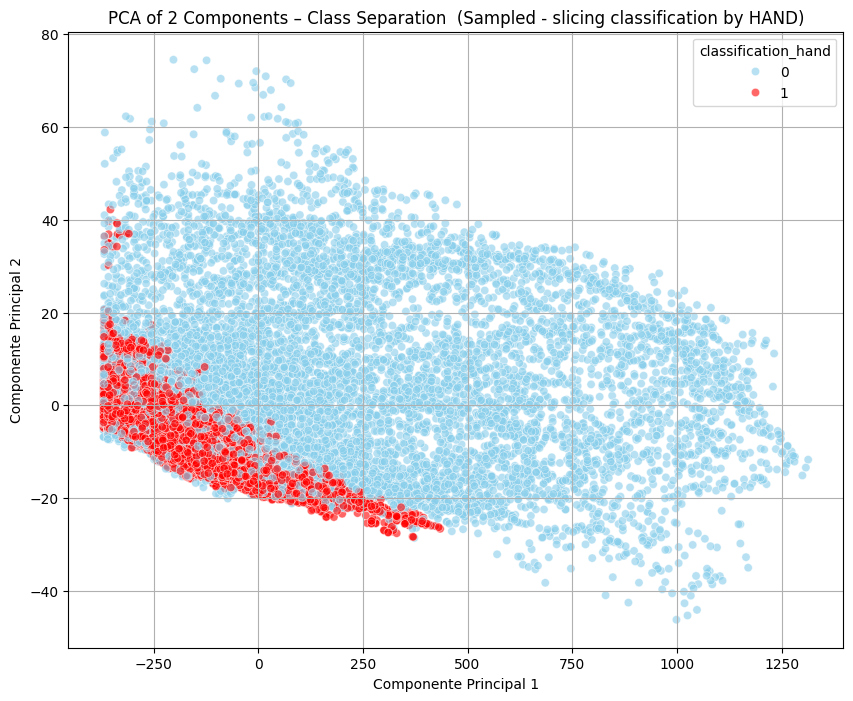

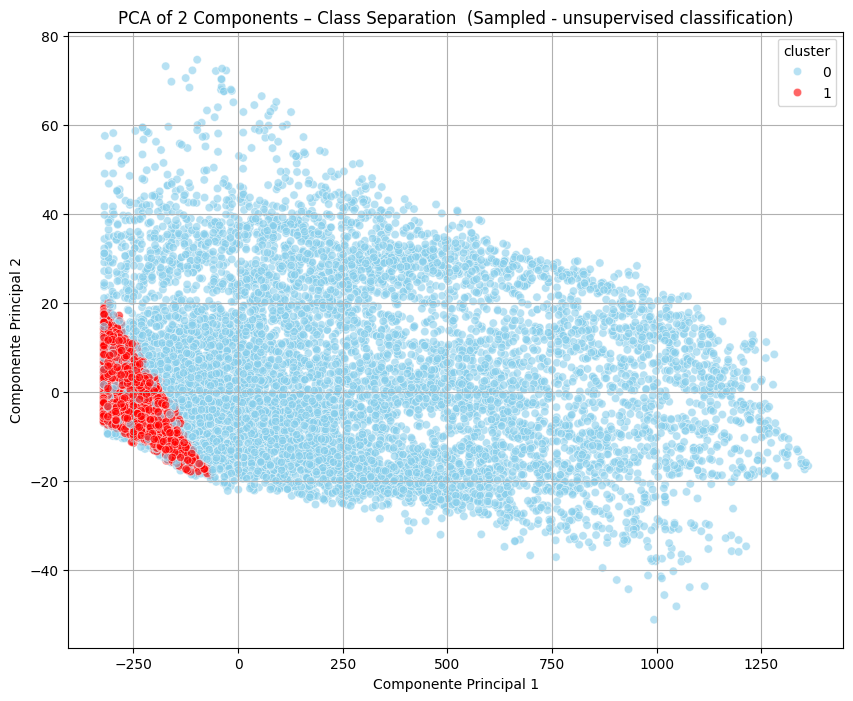

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for potentially nicer plots

def plot_pca_separability_sampled(dataframe, target_column, title_suffix=""):
    """
    Aplica PCA e plota a separabilidade das classes para um dataframe amostrado.

    Args:
        dataframe (pd.DataFrame): O DataFrame amostrado contendo os atributos e a coluna alvo.
        target_column (str): O nome da coluna alvo (classes).
        title_suffix (str): Sufixo para adicionar ao título do plot.
    """
    attributes = dataframe.drop(columns=[target_column])
    classes = dataframe[target_column]

    # Aplicar PCA com 2 componentes
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(attributes)

    # Plotar o scatter plot
    plt.figure(figsize=(10, 8))
    # Using seaborn for potentially better looking scatter plot and easier hue mapping
    sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=classes, palette={0: 'skyblue', 1: 'red'}, alpha=0.6)

    plt.title(f'PCA of 2 Components – Class Separation {title_suffix}')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(title=target_column)
    plt.grid(True)
    plt.show()

# Assuming the sampled dataframes are available and calling the function for each
if 'sampled_data_with_classification' in locals() and 'sampled_data_with_classification_hand' in locals() and 'sampled_data_with_cluster' in locals():

    # Plot for sampled_data_with_classification
    plot_pca_separability_sampled(sampled_data_with_classification, 'classification', " (Sampled - semi-supervised classification)")

    # Plot for sampled_data_with_classification_hand
    plot_pca_separability_sampled(sampled_data_with_classification_hand, 'classification_hand', " (Sampled - slicing classification by HAND)")

    # Plot for sampled_data_with_cluster
    plot_pca_separability_sampled(sampled_data_with_cluster, 'cluster', " (Sampled - unsupervised classification)")

else:
    print("Error: Sampled DataFrames not found. Please run the cell that creates the sampled dataframes.")

In [ ]:
import numpy as np
from scipy.spatial.distance import mahalanobis
from scipy.stats import multivariate_normal
import pandas as pd

def calculate_fdr(X1, X2):
    """Calculates Fisher's Discriminant Ratio."""
    mean1 = np.mean(X1, axis=0)
    mean2 = np.mean(X2, axis=0)
    var1 = np.var(X1, axis=0)
    var2 = np.var(X2, axis=0)

    # Avoid division by zero
    fdr = np.sum(((mean1 - mean2)**2) / (var1 + var2 + 1e-8))
    return fdr

def calculate_bhattacharyya_distance(X1, X2):
    """Calculates Bhattacharyya Distance assuming multivariate normal distributions."""
    mean1 = np.mean(X1, axis=0)
    mean2 = np.mean(X2, axis=0)
    cov1 = np.cov(X1.T)
    cov2 = np.cov(X2.T)

    # Add a small value to the diagonal for numerical stability
    cov1 += np.eye(cov1.shape[0]) * 1e-6
    cov2 += np.eye(cov2.shape[0]) * 1e-6

    try:
        cov_pooled = (cov1 + cov2) / 2
        term1 = 0.125 * np.dot((mean1 - mean2).T, np.linalg.solve(cov_pooled, (mean1 - mean2)))
        term2 = 0.5 * np.log(np.linalg.det(cov_pooled) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
        b_distance = term1 + term2
        return b_distance
    except np.linalg.LinAlgError:
        print("Warning: Could not calculate Bhattacharyya Distance due to singular covariance matrix.")
        return np.nan


def calculate_mahalanobis_distance(X1, X2):
    """Calculates the average Mahalanobis distance between points in X1 and X2."""
    mean1 = np.mean(X1, axis=0)
    mean2 = np.mean(X2, axis=0)
    cov_pooled = (np.cov(X1.T) + np.cov(X2.T)) / 2

    # Add a small value to the diagonal for numerical stability
    cov_pooled += np.eye(cov_pooled.shape[0]) * 1e-6

    try:
        inv_cov_pooled = np.linalg.inv(cov_pooled)
        avg_mahalanobis = mahalanobis(mean1, mean2, inv_cov_pooled)
        return avg_mahalanobis
    except np.linalg.LinAlgError:
        print("Warning: Could not calculate Mahalanobis Distance due to singular covariance matrix.")
        return np.nan


def evaluate_separability_indices(dataframe, target_column):
    """Calculates separability indices for a dataframe."""
    classes = dataframe[target_column].unique()
    if len(classes) != 2:
        print(f"Warning: Separability indices are typically for binary classification. Found {len(classes)} classes.")
        return np.nan, np.nan

    class_0_data = dataframe[dataframe[target_column] == classes[0]].drop(columns=[target_column]).values
    class_1_data = dataframe[dataframe[target_column] == classes[1]].drop(columns=[target_column]).values

    if len(class_0_data) < 2 or len(class_1_data) < 2:
         print("Warning: Need at least 2 samples in each class to calculate covariance. Skipping index calculation.")
         return np.nan, np.nan


    b_distance = calculate_bhattacharyya_distance(class_0_data, class_1_data)
    m_distance = calculate_mahalanobis_distance(class_0_data, class_1_data)

    return b_distance, m_distance

# Assuming the sampled dataframes are available
if 'sampled_data_with_classification' in locals() and 'sampled_data_with_classification_hand' in locals() and 'sampled_data_with_cluster' in locals():

    print("--- Evaluating sampled_data_with_classification ---")
    b_dist_clf, m_dist_clf = evaluate_separability_indices(sampled_data_with_classification, 'classification')
    print(f"Bhattacharyya Distance: {b_dist_clf:.2f}")
    print(f"Mahalanobis Distance: {m_dist_clf:.2f}")

    print("\n--- Evaluating sampled_data_with_classification_hand ---")
    b_dist_hand, m_dist_hand = evaluate_separability_indices(sampled_data_with_classification_hand, 'classification_hand')
    print(f"Bhattacharyya Distance: {b_dist_hand:.2f}")
    print(f"Mahalanobis Distance: {m_dist_hand:.2f}")


    print("\n--- Evaluating sampled_data_with_cluster ---")
    b_dist_cluster, m_dist_cluster = evaluate_separability_indices(sampled_data_with_cluster, 'cluster')
    print(f"Bhattacharyya Distance: {b_dist_cluster:.2f}")
    print(f"Mahalanobis Distance: {m_dist_cluster:.2f}")

else:
    print("Error: Sampled DataFrames not found. Please run the cell that creates the sampled dataframes.")

--- Evaluating sampled_data_with_classification ---
Bhattacharyya Distance: 3.51
Mahalanobis Distance: 3.25

--- Evaluating sampled_data_with_classification_hand ---
Bhattacharyya Distance: 1.84
Mahalanobis Distance: 1.94

--- Evaluating sampled_data_with_cluster ---
Bhattacharyya Distance: 2.11
Mahalanobis Distance: 1.98


In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# Assuming the sampled dataframes are available
if 'sampled_data_with_classification' in locals() and 'sampled_data_with_classification_hand' in locals() and 'sampled_data_with_cluster' in locals():

    print("--- Evaluating sampled_data_with_classification ---")
    X_clf = sampled_data_with_classification.drop(columns=['classification']).values
    labels_clf = sampled_data_with_classification['classification'].values
    try:
        silhouette_avg_clf = silhouette_score(X_clf, labels_clf)
        print(f"Silhouette Score: {silhouette_avg_clf:.2f}")
    except ValueError as e:
         print(f"Could not calculate Silhouette Score: {e}")


    print("\n--- Evaluating sampled_data_with_classification_hand ---")
    X_hand = sampled_data_with_classification_hand.drop(columns=['classification_hand']).values
    labels_hand = sampled_data_with_classification_hand['classification_hand'].values
    try:
        silhouette_avg_hand = silhouette_score(X_hand, labels_hand)
        print(f"Silhouette Score: {silhouette_avg_hand:.2f}")
    except ValueError as e:
         print(f"Could not calculate Silhouette Score: {e}")


    print("\n--- Evaluating sampled_data_with_cluster ---")
    X_cluster = sampled_data_with_cluster.drop(columns=['cluster']).values
    labels_cluster = sampled_data_with_cluster['cluster'].values
    try:
        silhouette_avg_cluster = silhouette_score(X_cluster, labels_cluster)
        print(f"Silhouette Score: {silhouette_avg_cluster:.2f}")
    except ValueError as e:
         print(f"Could not calculate Silhouette Score: {e}")

else:
    print("Error: Sampled DataFrames not found. Please run the cell that creates the sampled dataframes.")

--- Evaluating sampled_data_with_classification ---
Silhouette Score: 0.35

--- Evaluating sampled_data_with_classification_hand ---
Silhouette Score: 0.26

--- Evaluating sampled_data_with_cluster ---
Silhouette Score: 0.40
